Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
#loading csv to pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Positive
2. Negative

In [9]:
gold_data=gold_data.drop(['Date'], axis=1)
correlation= gold_data.corr()

<Axes: >

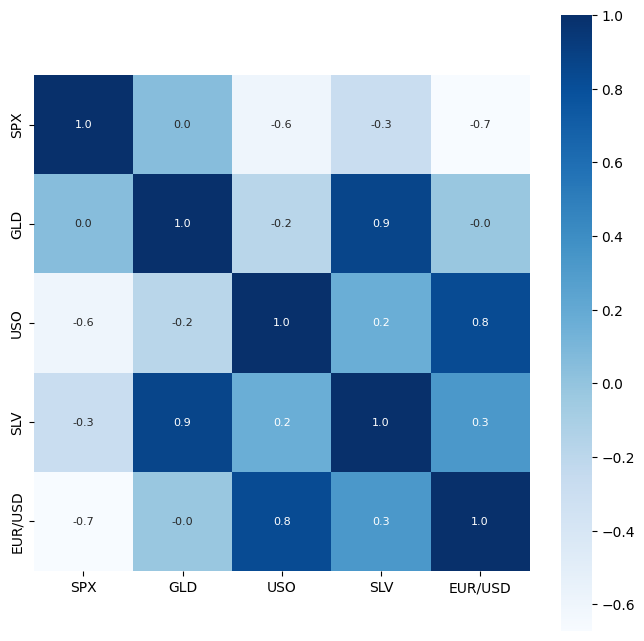

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
#correlation values og GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-12-3659675435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

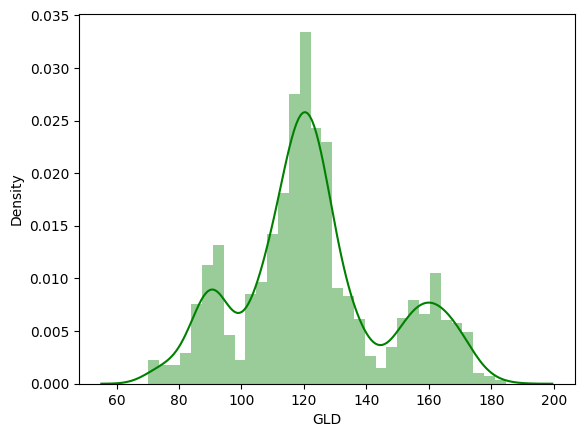

In [12]:
#check distribution of gold price
sns.distplot(gold_data['GLD'], color='green')

Splitting features and target

In [13]:
X=gold_data.drop(['GLD'], axis=1)
Y=gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and testing data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

Random forest regressor

In [15]:
regressor=RandomForestRegressor(n_estimators=100)

In [16]:
#training
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [17]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[168.4139992   81.73370009 116.02800007 127.59820054 120.74150136
 154.63189711 150.15859827 126.10690036 117.46299895 125.90340077
 116.746001   171.47920104 141.22409858 167.86869854 115.28039989
 117.56280059 139.45150285 170.21000067 159.30150278 160.53209934
 155.07090018 125.43350014 176.44159983 157.4018033  125.27000066
  93.64159939  77.59630017 120.51400003 119.10989901 167.33889997
  88.27260053 125.24960018  91.22520094 117.78640041 121.07369946
 136.20000021 115.25640114 115.24500087 146.44210036 107.31150111
 103.93510242  87.16229796 126.43830013 117.86109983 154.567899
 119.4821004  108.27869994 108.00319793  93.17930041 127.26499727
  74.77720028 113.69369912 121.23230025 111.26339927 118.89069915
 120.9180993  158.24570029 168.76060062 146.97219678  85.63709842
  94.39640042  86.85649837  90.51060013 119.04200064 126.42640059
 127.61799975 170.51949992 122.31919934 117.40379892  98.2744004
 168.23809933 143.21629784 132.43480297 121.16090192 121.25479933
 119.69230035

In [19]:
from logging import error
# r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.9895520847824051


Comparing actual and predicted values

In [20]:
Y_test=list(Y_test)

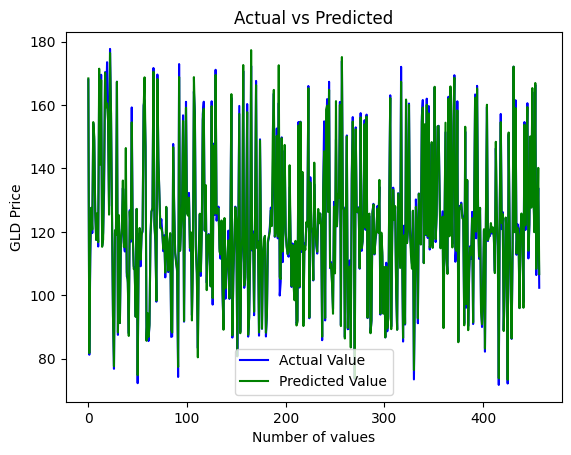

In [24]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()